In [2]:
import os
import logging
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydicom import dcmread

In [3]:
import sys
print(sys.executable)

C:\Users\Shevy Korzen\.conda\envs\viz\python.exe


In [4]:
path = 'metadata.pkl'
df = pd.read_pickle(path)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2591 entries, 0 to 2590
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PatientID          2591 non-null   object 
 1   PatientSex         2591 non-null   object 
 2   StudyDescription   2591 non-null   object 
 3   SeriesDescription  2591 non-null   object 
 4   Modality           2591 non-null   object 
 5   StudyDate          2591 non-null   object 
 6   Rows               2591 non-null   int64  
 7   Columns            2591 non-null   int64  
 8   SliceLocation      2591 non-null   float64
 9   Path               2591 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 202.5+ KB


In [6]:
df.head()

,PatientID,PatientSex,StudyDescription,SeriesDescription,Modality,StudyDate,Rows,Columns,SliceLocation,Path
0,03f7352aca5087fdea4ce8e59dbe68bd42b1b3943db9fb...,F,CT HEAD & CTA HEAD/NECK &CT PERF,Viz CBF,CT,20120707,256,256,12.5,../data\sample_scans_1\2c78819a9c32c163\0192d1...
1,03f7352aca5087fdea4ce8e59dbe68bd42b1b3943db9fb...,F,CT HEAD & CTA HEAD/NECK &CT PERF,Viz CBF,CT,20120707,256,256,12.5,../data\sample_scans_1\2c78819a9c32c163\0192d1...
2,03f7352aca5087fdea4ce8e59dbe68bd42b1b3943db9fb...,F,CT HEAD & CTA HEAD/NECK &CT PERF,Viz CBF,CT,20120707,256,256,12.5,../data\sample_scans_1\2c78819a9c32c163\0192d1...
3,03f7352aca5087fdea4ce8e59dbe68bd42b1b3943db9fb...,F,CT HEAD & CTA HEAD/NECK &CT PERF,Viz CBF,CT,20120707,256,256,12.5,../data\sample_scans_1\2c78819a9c32c163\0192d1...
4,03f7352aca5087fdea4ce8e59dbe68bd42b1b3943db9fb...,F,CT HEAD & CTA HEAD/NECK &CT PERF,Viz CBF,CT,20120707,256,256,12.5,../data\sample_scans_1\2c78819a9c32c163\0192d1...


In [7]:
df.PatientID.nunique()

14

In [8]:
df.PatientID.value_counts()

00951041c2622fe1fa25fc02093e4f73d2ea40e7e8ba44908a5046ffbdab9826    1152
008890019de60ee8115c0e4e60f72f8aa37005a60b5f52907078d1aea0f103bb     551
005815169a4cba850b5fcde2bb36742bd65ff56f2948fa21e6b7fe6062465b4c     172
004b495255ad6361593da08f33763f522c618d76244cf00f11dd2633b7aa2bdf     118
00b26d869a456e569ae07c06246c2ea49f29aa116d1b39696f696a978a7a261f     104
00c5ea378495bd0429b3eec9b46e15c50c046ac9a83b8cd7ff5ba3be8f5b9b80     102
00aff75373b5307fc98dd1c19ff5e7cb848c1a2546b0df6dae80d370d8aff480      76
007f1a47ee91f969a40875a6ac7921ade8b6f03b98f4d35b04102adbfaf3ec76      64
006846c0a7331f9dd8a7e44e885081d0d0a215487ae492723b86fb84ec27a26c      64
0089189bf816f88bbdbd3223c4362745d49588e40d60318085ce1ab3824498e6      64
00890ff862feeb40a4bc452a67e4244b20ad9e0fcda8e9e64852172233306d03      64
00ac179e64bba50e2f707b664c1bb015e85ca2bbfcb96b15f336f68ec93c23f6      34
03f7352aca5087fdea4ce8e59dbe68bd42b1b3943db9fbb0022d2129a44a73a6      16
03578da565592f747fbef7b5dfe5b34cc12c00337d426cd97bf

In [9]:
df.SeriesDescription.value_counts()

CTA HEAD AND NECK SOURCE     598
BRAIN                        547
CTA HEAD AND NECK            508
Viz SDH EMBOLISE             411
PERFUSION SOURCE             384
Viz CBF                       32
LVO Localization              24
Viz SUMMARY                   23
Viz AIF and VOF Locations     16
Viz TMAX                      16
Viz MTT                       16
Viz CBV                       16
Name: SeriesDescription, dtype: int64

In [10]:
df.StudyDescription.value_counts().sort_index()

CT ANGIOGRAPHY-HEAD                   10
CT HEAD                              862
CT HEAD & CTA HEAD & NECK            551
CT HEAD & CTA HEAD/NECK &CT PERF    1168
Name: StudyDescription, dtype: int64

In [11]:
df.groupby(['StudyDescription']).PatientID.nunique()

StudyDescription
CT ANGIOGRAPHY-HEAD                  1
CT HEAD                             10
CT HEAD & CTA HEAD & NECK            1
CT HEAD & CTA HEAD/NECK &CT PERF     2
Name: PatientID, dtype: int64

In [12]:
def display_dicom_file(path):
    ds = dcmread(path)
    print()
    print(f"File path........: {path}")
    print(f"SOP Class........: {ds.SOPClassUID} ({ds.SOPClassUID.name})")
    print()

    print(f"Patient ID.........: {ds.PatientID}")
    print(f"Patient Sex........: {ds.PatientSex}")
    print(f"Study Description..: {ds.StudyDescription}")
    print(f"Series Description.: {ds.SeriesDescription}")
    print(f"Modality...........: {ds.Modality}")
    print(f"Study Date.........: {ds.StudyDate}")
    print(f"Image size.........: {ds.Rows} x {ds.Columns}")
    print(f"Pixel Spacing......: {ds.PixelSpacing}")
    print(f"Image Shape........: {ds.pixel_array.shape}")

    # use .get() if not sure the item exists, and want a default value if missing
    print(f"Slice location...: {ds.get('SliceLocation', '(missing)')}")

    # plot the image using matplotlib
    plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
    plt.show()


File path........: ../data\sample_scans_2\e6af016d16fa05a0\01cd156160af4a7d\5dea7affbfda2f04
SOP Class........: 1.2.840.10008.5.1.4.1.1.2 (CT Image Storage)

Patient ID.........: 00951041c2622fe1fa25fc02093e4f73d2ea40e7e8ba44908a5046ffbdab9826
Patient Sex........: F
Study Description..: CT HEAD & CTA HEAD/NECK &CT PERF
Series Description.: CTA HEAD AND NECK SOURCE
Modality...........: CT
Study Date.........: 20010424
Image size.........: 512 x 512
Pixel Spacing......: [0.566406, 0.566406]
Image Shape........: (512, 512)
Slice location...: 116.875


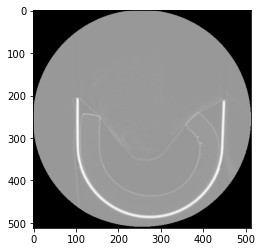


File path........: ../data\sample_scans_4\347e91b3deaab4ca\2e30d212bb44c772\cb52820838b6a2e7
SOP Class........: 1.2.840.10008.5.1.4.1.1.2 (CT Image Storage)

Patient ID.........: 008890019de60ee8115c0e4e60f72f8aa37005a60b5f52907078d1aea0f103bb
Patient Sex........: F
Study Description..: CT HEAD & CTA HEAD & NECK
Series Description.: CTA HEAD AND NECK
Modality...........: CT
Study Date.........: 19970222
Image size.........: 512 x 512
Pixel Spacing......: [0.525391, 0.525391]
Image Shape........: (512, 512)
Slice location...: 119.750


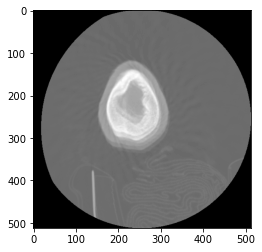


File path........: ../data\sample_scans_3\b8fe9ea4ff0eab7d\09a40e14cd489d2d\1e82bae587085491
SOP Class........: 1.2.840.10008.5.1.4.1.1.7 (Secondary Capture Image Storage)

Patient ID.........: 006846c0a7331f9dd8a7e44e885081d0d0a215487ae492723b86fb84ec27a26c
Patient Sex........: F
Study Description..: CT HEAD
Series Description.: Viz SDH EMBOLISE
Modality...........: CT
Study Date.........: 20110315
Image size.........: 602 x 512
Pixel Spacing......: [0.490234, 0.490234]
Image Shape........: (602, 512, 3)
Slice location...: -85.250


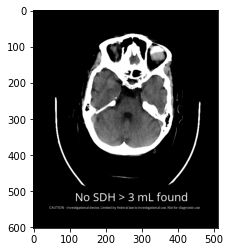


File path........: ../data\sample_scans_2\e6af016d16fa05a0\01cd156160af4a7d\d818b1176b466eac
SOP Class........: 1.2.840.10008.5.1.4.1.1.2 (CT Image Storage)

Patient ID.........: 00951041c2622fe1fa25fc02093e4f73d2ea40e7e8ba44908a5046ffbdab9826
Patient Sex........: F
Study Description..: CT HEAD & CTA HEAD/NECK &CT PERF
Series Description.: CTA HEAD AND NECK SOURCE
Modality...........: CT
Study Date.........: 20010424
Image size.........: 512 x 512
Pixel Spacing......: [0.566406, 0.566406]
Image Shape........: (512, 512)
Slice location...: -95.000


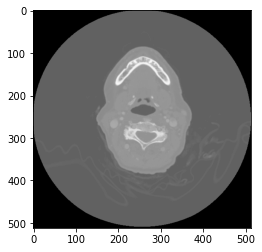

In [39]:
n = 4
for path in df['Path'].sample(n):
   display_dicom_file(path) 

In [42]:
ds = dcmread(path)
image = ds.pixel_array

(array([[480.,   0.,   0., ...,   0.,   0.,   0.],
        [456.,   0.,   0., ...,   0.,   0.,   0.],
        [440.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [440.,   0.,   0., ...,   0.,   0.,   0.],
        [456.,   0.,   0., ...,   0.,   0.,   0.],
        [480.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([-2000. , -1469.6,  -939.2,  -408.8,   121.6,   652. ,  1182.4,
         1712.8,  2243.2,  2773.6,  3304. ]),
 <a list of 512 BarContainer objects>)

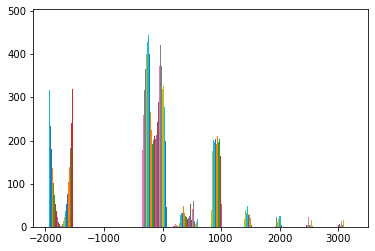

In [43]:
plt.hist(image)

In [44]:
def rescale_hu(dicom_ds):
        '''
        Rescale Dicom file image to the Hounsfield scale
        using the following linear transformation:
        rescaled pixel = pixel * RescaleSlope + RescaleIntercept
        '''
        image = dicom_ds.pixel_array
        print(dicom_ds.RescaleSlope)
        print(dicom_ds.RescaleIntercept)
        return image * dicom_ds.RescaleSlope + dicom_ds.RescaleIntercept

In [45]:
image = rescale_hu(ds)

1
-1024


(array([[480.,   0.,   0., ...,   0.,   0.,   0.],
        [456.,   0.,   0., ...,   0.,   0.,   0.],
        [440.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [440.,   0.,   0., ...,   0.,   0.,   0.],
        [456.,   0.,   0., ...,   0.,   0.,   0.],
        [480.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([-3024. , -2493.6, -1963.2, -1432.8,  -902.4,  -372. ,   158.4,
          688.8,  1219.2,  1749.6,  2280. ]),
 <a list of 512 BarContainer objects>)

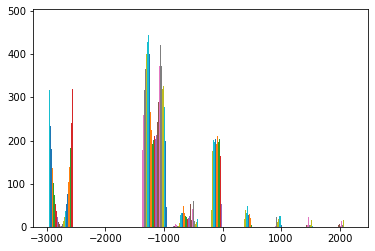

In [46]:
plt.hist(image)